In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np



In [56]:
fileName = '2AHHF06'

dfINPE = pd.read_csv('Pontos\\'+fileName+'.txt', skiprows=12, names=['ABS_Ant', 'PHA_Ant', 'ABS_Ref', 'PHA_Ref', 'E'])
dfINPE = dfINPE.iloc[:-1, :-1]
dfINPE['ABS_Ant'] = pd.to_numeric(dfINPE['ABS_Ant'], errors='coerce')
# dfINPE['POSr'] = np.radians(range(360+alphaINPE, 0+alphaINPE,-1))
config = pd.read_csv('Pontos\\'+fileName+'.txt', skiprows=2, nrows=3, names = ['#','npts', 'start', 'stop', 'roll', 'direction','0']).iloc[0]

stepROLL = -1 if config['direction']== 'REVERSE'else 1
alpha = -90
dfINPE['POSr'] = np.radians(range(int(config['start'])+alpha,int(config['stop'])+alpha+stepROLL, stepROLL))

dfINPE

,ABS_Ant,PHA_Ant,ABS_Ref,PHA_Ref,POSr
0,-55.094,-141.6867,-38.969,-111.4367,1.570796
1,-55.074,-143.2579,-38.974,-111.4394,1.553343
2,-55.063,-144.8203,-38.964,-111.4385,1.535890
3,-55.065,-146.2396,-38.988,-111.4219,1.518436
4,-55.059,-147.6816,-38.979,-111.4329,1.500983
...,...,...,...,...,...
355,-55.235,-136.5516,-38.932,-111.4389,-4.625123
356,-55.174,-137.6681,-38.949,-111.4604,-4.642576
357,-55.134,-139.0370,-38.950,-111.4501,-4.660029
358,-55.086,-140.1281,-38.969,-111.4736,-4.677482


TypeError: object of type 'numpy.float64' has no len()

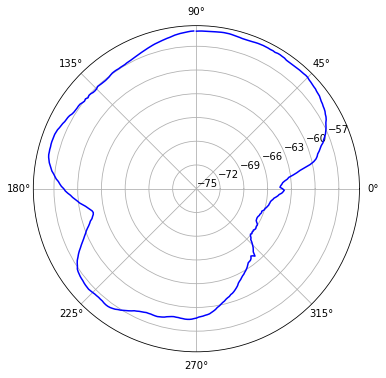

In [58]:
angulos_marcas = np.deg2rad(90)


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='polar')
ax.plot(dfINPE['POSr'], dfINPE['ABS_Ant'], label='Dados de Exemplo', color='blue')
plt.yticks(range(round(max(dfINPE['ABS_Ant'])-20), round(max(dfINPE['ABS_Ant'])), 3))

ax.set_xticks(angulos_marcas)
ax.set(ylim=(max(dfINPE['ABS_Ant'])-20, max(dfINPE['ABS_Ant'])))
ax.set_title('Gráfico Polar Personalizado')
ax.legend()
plt.show()